# KNTU_IPM Machine Learning
# QUIZ
##  - Regularized Logistic Regression



# student ID :
# first and last name :

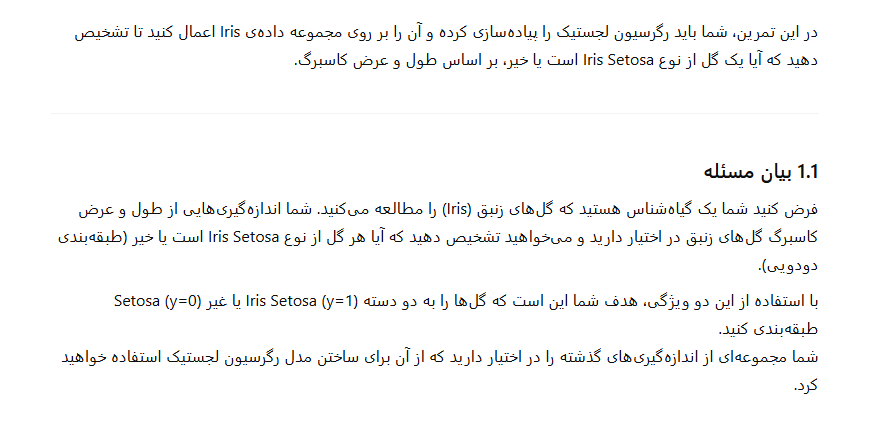

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
-  ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="3"></a>
##  - Regularized Logistic Regression

In this QUIZ, you will implement logistic regression and apply it to the Iris dataset to classify whether a flower is Iris Setosa based on sepal length and sepal width.


<a name="3.1"></a>
### 1.1 Problem Statement

Suppose you are a botanist studying Iris flowers. You have measurements of sepal length and sepal width for a collection of Iris flowers, and you want to determine whether each flower is Iris Setosa or not (binary classification).

From these two measurements, you aim to classify flowers as Iris Setosa (y=1) or not Iris Setosa (y=0).
You have a dataset of past measurements, which you will use to build a logistic regression model.
<a name="3.2"></a>
### 1.2 Loading and visualizing the data

let's start by loading the dataset for this task and visualizing it. 
The dataset can be loaded using scikit-learn:


# در این کوییز نیازی به فایل دیتا ندارید و از دیتا ست های سایکت لرن استفاده میکنیم   
#  فقط کافیه  دیتای مورد نیازمون رو از سایکت لرن ایمپورت کنیم

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Filter for binary classification: Iris Setosa (0) vs. others (1, 2)
data = data[data['target'].isin([0, 1])]  # Use Setosa (0) and Versicolor (1) for simplicity
X_train = data[['sepal length (cm)', 'sepal width (cm)']].to_numpy()
y_train = (data['target'] == 0).astype(int)  # 1 for Setosa, 0 for others



#### View the variables

The code below prints the first five values of `X_train` and `y_train` and the type of the variables.


In [3]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Type of X_train: <class 'numpy.ndarray'>
y_train: 0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int32
Type of y_train: <class 'pandas.core.series.Series'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [4]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### Visualize your data

The helper function `plot_data` (from `utils.py`) is used to generate a figure 

# برای بدست اوردن شهود بهتری از داده ها بصورت ویژوال ازش نمودار بگیرید

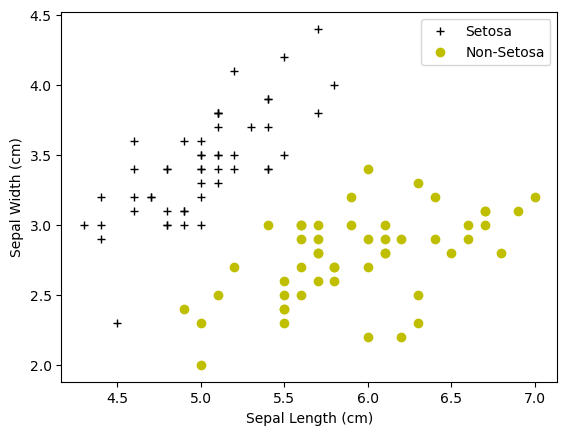

In [5]:
# Plot
plot_data(X_train, y_train, pos_label="Setosa", neg_label="Non-Setosa")
plt.ylabel('Sepal Width (cm)')
plt.xlabel('Sepal Length (cm)')
plt.legend(loc="upper right")
plt.show()

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.


<a name="3.3"></a>
### 1.3 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector. 

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot. 
- We have provided the `map_feature` function for you in utils.py. 

## نیازی برای تعریف کردن این قسمت نیست در فایل پیوست تعریف شده هستش

In [6]:
print("Original shape of data:", X_train.shape)
mapped_X = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)


Original shape of data: (100, 2)
Shape after feature mapping: (100, 27)


Let's also print the first elements of `X_train` and `mapped_X` to see the tranformation.

In [7]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [5.1 3.5]
mapped X_train[0]: [5.10000000e+00 3.50000000e+00 2.60100000e+01 1.78500000e+01
 1.22500000e+01 1.32651000e+02 9.10350000e+01 6.24750000e+01
 4.28750000e+01 6.76520100e+02 4.64278500e+02 3.18622500e+02
 2.18662500e+02 1.50062500e+02 3.45025251e+03 2.36782035e+03
 1.62497475e+03 1.11517875e+03 7.65318750e+02 5.25218750e+02
 1.75962878e+04 1.20758838e+04 8.28737122e+03 5.68741162e+03
 3.90312562e+03 2.67861562e+03 1.83826562e+03]


<a name="2.3"></a>
###   Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>

Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

# در ادامه از شما خواسته شده تا در محل مشخص شده  کد تابع سیگمویند رو وارد کنید 


In [14]:
#  FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
 

   


    ### END SOLUTION ###  
    
    return g

While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the Quiz, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

<a name="3.4"></a>
### 1.4 Cost function for regularized logistic regression

In this part, you will implement the cost function for regularized logistic regression.

Recall that for regularized logistic regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare this to the cost function without regularization (which you implemented above), which is of the form 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Note that the $b$ parameter is not regularized.

## کد کاست فانکشن  را در قسمت مشخص شده وارد کنید 
## 

## قدم به قدم کاست فانکشن رگولار شده رو تعریف کنید

In [23]:
# کاست فانکشن رگولار شده را تعریف کنید 
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    
         # Compute unregularized cost
        
        
           # Add regularization term (exclude bias from regularization)
            
            
    ### END CODE HERE ### 
    


## از تابعی که تعریف کردید تست بگیرید
##  از نبودن ارور و جوابی که میگیرید اطمینان داشته باشید

<a name="3.5"></a>
### 1.5 Gradient for regularized logistic regression

In this section, you will implement the gradient for regularized logistic regression.


The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$ 






## در این قسمت ترجمان فرمولبندی گرادیان رو ازتون میخواهیم 
## add regularization term
## در قسمت مشخص شده کد خود را بنویسید 

In [ ]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
  

    ### START CODE HERE ###     
  
            # Compute predictions


            # Compute gradients


            # Initialize dj_dw with zeros

            # Compute gradient for w with regularization term



    ### END CODE HERE ###         
        
    return dj_db, dj_dw

## از تابع خود تست بگیرید

<a name="3.6"></a>
### 1.6 Learning parameters using gradient descent

Similar to the previous parts, you will use your gradient descent function implemented above to learn the optimal parameters $w$,$b$. 
- If you have completed the cost and gradient for regularized logistic regression correctly, you should be able to step through the next cell to learn the parameters $w$. 
- After training our parameters, we will use it to plot the decision boundary. 

**Note**

The code block below takes quite a while to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you hae time, run for 100,000 iterations to see better results.

## با تغییر دادن پارامتر ها ,میتونید مدل اپتیمال رو مشاهده کنید (لامبدا ,تعداد ایتریشن ها و الفا )

In [ ]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

<a name="3.7"></a>
### 1.7 Plotting the decision boundary
To help you visualize the model learned by this classifier, we will use our `plot_decision_boundary` function which plots the (non-linear) decision boundary that separates the positive and negative examples. 

- In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.



In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)
plt.ylabel('Sepal Width (cm)')
plt.xlabel('Sepal Length (cm)')
plt.legend(loc="upper right")
plt.show()

<a name="3.8"></a>
### 1.8 Evaluating regularized logistic regression model

You will use the `predict` function that you implemented above to calculate the accuracy of the regulaized logistic regression model on the training set

## در این قسمت با درصد گرفتن از مقادیر حدس زده شده و مقادیر ترین شده دقت مدل خودتون رو بیان کنید


In [26]:

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
  
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
   
    return p

In [ ]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

## خسته نباشید , با ارزوی موفقیت 